In [13]:
%run util.py


In [14]:
printTime()
seed = np.random.randint(1000) 
seed = 932 #(496,type 3)
print ("seed: ",seed)
np.random.seed(seed)

algo_type = 'roboost'
root = '202509/generatedData/'+algo_type+"/"
(X, y ,true_w,true_b,poly) = generateData((5000,100),30,eta=0.2,noise_type=3,split=False)
# (X, y ,true_w,true_b) = generateData((5000,100),50,eta=0.25,noise_type=2,split=False)
large_w_ind = np.argsort(-true_w)
print(true_w[large_w_ind][:25],large_w_ind[:25])
print(poly)

Latest excution of this block: Sun Sep 14 11:57:35 2025
seed:  932
generated data of shape:  (5000, 100) noisy data 975 , 1 vs -1 : 2009 2991
[0.09091569 0.08374534 0.07937181 0.05024463 0.04903167 0.04858309
 0.04666262 0.0432262  0.04120198 0.03846628 0.03695076 0.03644245
 0.03535793 0.03525282 0.03469485 0.03162953 0.02963711 0.02870036
 0.02455415 0.02126313 0.02103154 0.0183787  0.01780807 0.01349619
 0.01168206] [20 10 21  8 14  0 25 13  7 26 15  2 22  9 29  5 27 16 24  1  3 28 11 17
 18]
{'coeff': array([-0.59573525,  0.12420779,  0.44170315]), 'b': 0, 'ind': [30, 31, 32]}


In [47]:
printTime()
algo_type = 'adaboost'
# these comparison looks good
# adult, proc-diabetes, proc-bank, spambase

# adult, breastcancer, careval, compasbin, ficobin, mammo, proc-bank, proc-diabetes, proc-heart, proc-ionosphere, mushroom, spambase
their_result_dataset_name = 'proc-diabetes'
root = '202509/'+their_result_dataset_name+'/'
datasets = {
    # 'proc-diabetes':{'name':"diabetes_scale.csv", 'ratio':0.25, 'label_map':[-1,1], 'label_ind': -1,'exclude':[]},
    'adult':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/adult_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-5000},
    'proc-diabetes':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/proc-diabetes_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'proc-bank':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/proc-bank_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-10000},
    'spambase':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/spambase_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-2000},
    'breastcancer':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/breastcancer_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'careval':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/careval_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'compasbin':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/compasbin_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'ficobin':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/ficobin_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':5000},
    'mammo':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/mammo_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'proc-heart':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/proc-heart_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'proc-ionosphere':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/proc-ionosphere_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'mushroom':{'name':"./frost24/PartiallyInterpretableModels/src/data/datasets/mushroom_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1}
}
X,y = loadData(**datasets[their_result_dataset_name])

Latest excution of this block: Sun Sep 14 13:54:09 2025
--------- dataset summary: ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    float64
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
None
(768, 8) (768,)
[[6.0000000e+00 1.4800000e+02 7.2000000e+01 3.5000000e+01 0.0000000e+00
  3.3599998e+01 6.2700000e-01 5.0000000e+01]
 [1.0000000e+00 8.5000000e+01 6.6000000e+01 2.9000000e+01 0.0000000e+00
  2.6600000e+01 3.5100000e-01 3.1000000e+01]
 [8.0000000e+00 1.8300000e+02 6.4000000e+01 0.0000000e+00 0.0000000e+00
  2.3299999e+01 6.7200000e-0

In [20]:
print(root)

ms = time.time_ns()
print ((time.time_ns()-ms)/1000000)

202509/adult/
0.075


In [12]:
# grid search for best blackbox params
printTime()
seed = 932 #(186,226,type 3)
print ("seed: ",seed)
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=seed)

# param_grid = {'learning_rate': [0.01,0.05,0.1], 
#               'n_estimators': [100,250],
#               'max_depth':[3,5,7]
#              }
# grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3) 


param_grid = {
    'hidden_layer_sizes': [(10,10,10),(20,100,20),(10,10),(50,50,5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001,0.0002, 0.05],
}
grid = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3) 

# param_grid = {'C': [0.2, 0.5, 1.0, 2.0, 5.0], 
#               'kernel': ['linear','rbf'],
#               'gamma':['scale','auto',0.0001,0.0005,0.01]
#              }
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 


# # fitting the model for grid search 
grid.fit(X_train, y_train) 
y_pred_grid = grid.predict(X_test) 
print("Error:",1.0-metrics.accuracy_score(y_test, y_pred_grid))
print(grid.best_params_) 





In [45]:
def init_blackbox(root):
    if 'generatedData' in root:
        bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
        blackbox = SVC(**bb_params)
    elif 'adult' in root:
        bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}#{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
        blackbox = GradientBoostingClassifier(**bb_params)
    elif 'proc-bank' in root:
        bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
        blackbox = GradientBoostingClassifier(**bb_params)
    elif 'proc-diabetes' in root:
        params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
        blackbox = SVC(**params)
    elif 'spambase' in root:
        bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
        blackbox = GradientBoostingClassifier(**bb_params)
    return blackbox

def init_k_theta(root):
    if 'generatedData' in root:
        k_list = [9,15,21]
        theta_list = [2.0/9,2.0/15,2.0/21]
    elif 'adult' in root:
        k_list=[9,15,21]
        theta_list = [2.0/9,2.0/15,2.0/21]
    elif 'proc-bank' in root:
        k_list=[9,11,13]
        theta_list = [2.0/9,2.0/11,2.0/13]
    elif 'proc-diabetes' in root:
        k_list=[9,11,13]
        theta_list = [2.0/9,2.0/11,2.0/13]
    elif 'spambase' in root:
        k_list=[9,13,17]
        theta_list = [2.0/9,2.0/13,2.0/17]
    return k_list,theta_list


In [36]:
%run util.py
# # saved best params

print (root)
blackbox = init_blackbox(root)


folds = KFold(n_splits= 3,shuffle=True,random_state=42)
scores = []
for j, (train_index, test_index) in enumerate(folds.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    blackbox.fit(X_train, y_train) 
    y_pred_bb = blackbox.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred_bb))
print("%0.3f \pm %0.3f" % (1.0-np.mean(scores), np.std(scores)))

202509/spambase/
0.047 \pm 0.009


In [37]:
def eachFold(X_train,y_train,X_test,y_test,k,theta,algo='adaboost',blackbox = SVC(), verbose=1):
    # train a full classifier using 'algo' and 100 decision stumps
    times = []
    ts = time.time_ns()
    if 'proc-diabetes' in root: 
        n_base_learners = 50 # 50 for diabetes
    else:
        n_base_learners = 100
    if (algo=='roboost'):
        f = roBoost(X_train,y_train,n_base_learners,0.3,verbose = 1,r_lb=0.03)
    else:
        f = adaBoost(X_train,y_train,n_base_learners) 
    times.append(time_diff(ts))
    # sample k out of the full classifier abf
    beta =0.99/k
    ts = time.time_ns()
    g = deRandomizeSampleHypotheses(f,k,X_train,y_train,beta,verbose = 0)
    times.append(time_diff(ts))
    
    #blackbox = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,25,5), random_state=1)
    ts = time.time_ns()
    blackbox.fit(X_train, y_train)
    times.append(time_diff(ts))
    
    # plot_margin_distribution(X_test,y_test,g,theta,name='g')
    error_cover_margin = compute_error_ERROR_cover_margin(X_train,y_train,X_test,y_test,g,k,theta,blackbox) # (7,k+1) eEc_eEc_m

    
    y_pred_bb = blackbox.predict(X_test) 
    error_bb = 1 - metrics.accuracy_score(y_test, y_pred_bb)
    
    stats = []
    (ind,c) = cover(g,X_test,theta)
    e = marginError(X_test[ind],y_test[ind],g,0)
    error_f = marginError(X_test,y_test,f)

    mask = np.ones(y_test.shape[0], dtype=bool)
    mask[ind] = False
    u_ind = np.arange(y_test.shape[0])[mask]

    if u_ind.shape[0]>0:
        E = 1 - metrics.accuracy_score(y_test[u_ind], y_pred_bb[u_ind])
    else:
        E = 0
    ERROR = (e*ind.shape[0]+E*u_ind.shape[0])/y_test.shape[0]
    
    stats = [c,e,error_bb,error_f,ERROR,E] # coverage, error on covered, error bb only, error f only, ERROR of pipeline, error on uncovered

    if algo=='adaboost':
        theta_c = 1.1*theta # this is a choice of beta in cor. adaBoost c and b result
        theta_b = 0
        c_theta = 1 - marginError(X_train,y_train,f,theta_c) #- np.exp(-k/8.0*(theta_c-theta)**2)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    else:
        nu = 0.3
        rho = 1.0
        theta_b = 0
        c_theta = 1 - nu #- np.exp(-k/32.0)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    stats.append(c_theta)
    stats.append(b_theta)
    
    if verbose>0:
        printClassifierFeatures(g,print_weights=False)
        # print("compare to top feature in true w")
        # print(large_w_ind[:k])
        # print(true_w[large_w_ind][:k])
        # print ("P_S[y * f(x) < 0] = ",marginError(X_train,y_train,f))
        # print ("P_S[y * g(x) < 0] = ",marginError(X_train,y_train,g))
        
        print ("P_D[y * f(x) < 0] = ",marginError(X_test,y_test,f))
        print ("P_D[y * g(x) < 0] = ",marginError(X_test,y_test,g))
        print("coverage at theta  = ", theta, "is", c, " = % of test data st. |g(x)| >= theta")
        print ("P_D[y * g(x) < 0 | cover] = ", e)
        
        # theta_c = 1.1*theta
        # theta_b = 0#-theta/5.0
        # print ("P_S[y * f(x) < theta_c] = ",marginError(X_train,y_train,f,theta_c))
        
        print ("tighter c_theta: 1-P_S[y * f(x) < theta_c] = ",c_theta)
        print("tighter b_theta: ",b_theta)
        
           

    return (error_cover_margin,stats,times)

Latest excution of this block: Sun Sep 14 13:00:03 2025
currently output to 202509/spambase/
Sparsify adaboost to  9 base learners:
Fold 0:
----------------- classifier summary -----------------
features:  [np.int64(51), np.int64(52), np.int64(15), np.int64(20), np.int64(24), np.int64(54), np.int64(6), np.int64(45), np.int64(6)]
P_D[y * f(x) < 0] =  0.0650759219088937
P_D[y * g(x) < 0] =  0.10845986984815618
coverage at theta  =  0.2222222222222222 is 0.789587852494577  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.0521978021978022
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.37850241545893715
tighter b_theta:  0.16464582003828976
Fold 1:
----------------- classifier summary -----------------
features:  [np.int64(52), np.int64(51), np.int64(6), np.int64(55), np.int64(24), np.int64(15), np.int64(45), np.int64(51), np.int64(51)]
P_D[y * f(x) < 0] =  0.05217391304347826
P_D[y * g(x) < 0] =  0.07391304347826087
coverage at theta  =  0.2222222222222222 is 0.7  = % o

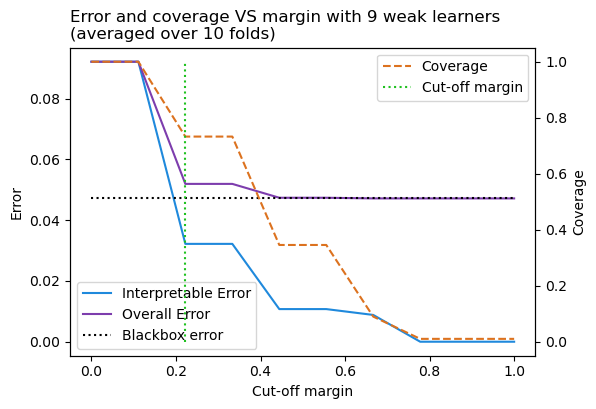

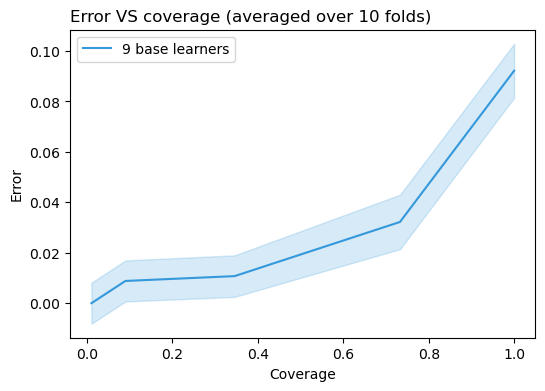

Sparsify adaboost to 13 base learners:
Fold 0:
----------------- classifier summary -----------------
features:  [np.int64(51), np.int64(52), np.int64(15), np.int64(20), np.int64(55), np.int64(6), np.int64(24), np.int64(4), np.int64(45), np.int64(51), np.int64(24), np.int64(44), np.int64(6)]
P_D[y * f(x) < 0] =  0.0650759219088937
P_D[y * g(x) < 0] =  0.09544468546637744
coverage at theta  =  0.15384615384615385 is 0.841648590021692  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.03865979381443299
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.58743961352657
tighter b_theta:  0.10608552631578948
Fold 1:
----------------- classifier summary -----------------
features:  [np.int64(52), np.int64(51), np.int64(6), np.int64(55), np.int64(15), np.int64(24), np.int64(4), np.int64(54), np.int64(36), np.int64(6), np.int64(45), np.int64(51), np.int64(51)]
P_D[y * f(x) < 0] =  0.05217391304347826
P_D[y * g(x) < 0] =  0.07173913043478261
coverage at theta  =  0.153846153846153

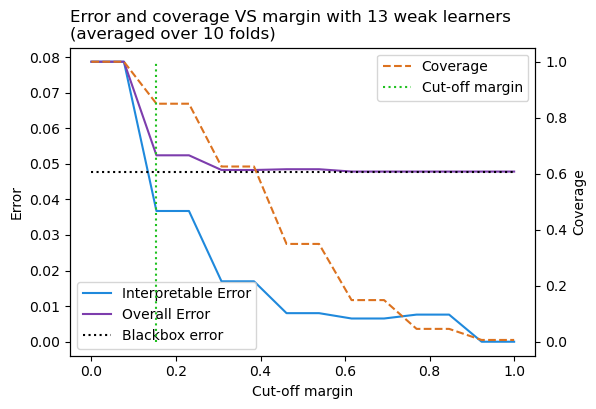

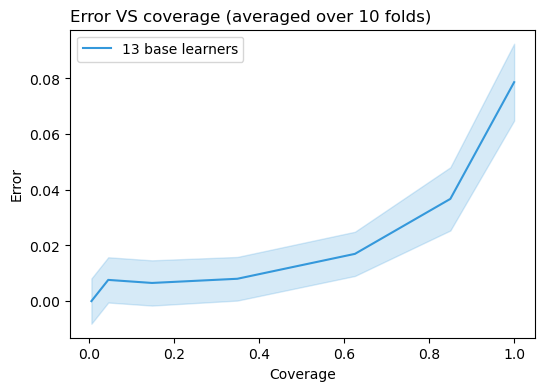

Sparsify adaboost to 17 base learners:
Fold 0:
----------------- classifier summary -----------------
features:  [np.int64(51), np.int64(52), np.int64(15), np.int64(20), np.int64(55), np.int64(6), np.int64(24), np.int64(4), np.int64(54), np.int64(24), np.int64(6), np.int64(45), np.int64(51), np.int64(26), np.int64(44), np.int64(7), np.int64(36)]
P_D[y * f(x) < 0] =  0.0650759219088937
P_D[y * g(x) < 0] =  0.08026030368763558
coverage at theta  =  0.11764705882352941 is 0.8524945770065075  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.030534351145038167
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.7164251207729468
tighter b_theta:  0.08698583951449765
Fold 1:
----------------- classifier summary -----------------
features:  [np.int64(52), np.int64(51), np.int64(6), np.int64(55), np.int64(15), np.int64(24), np.int64(4), np.int64(54), np.int64(20), np.int64(24), np.int64(6), np.int64(45), np.int64(52), np.int64(26), np.int64(52), np.int64(22), np.int64(41)]
P_D[y 

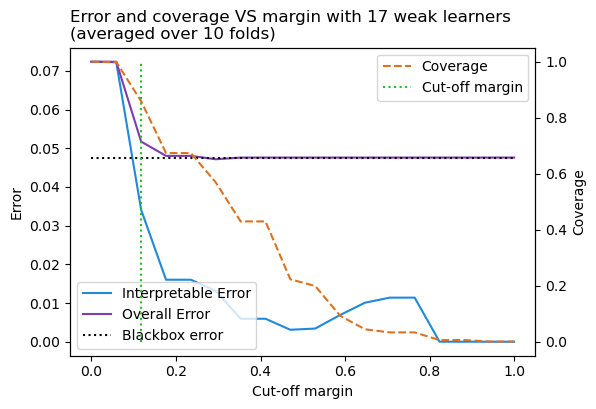

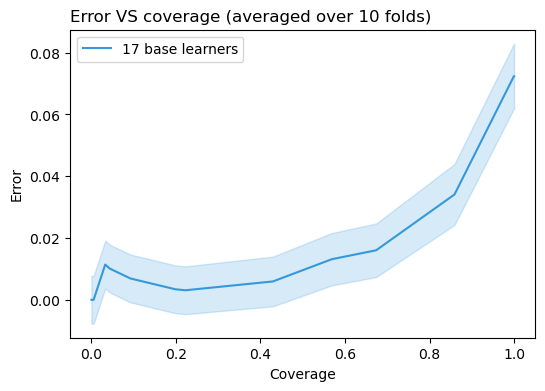

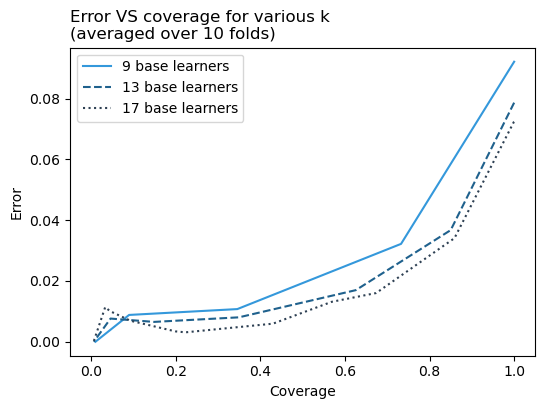

In [38]:
%run util.py
printTime()
print('currently output to '+root )

n_folds = 10  # 4 for generated, 10 for datasets
if 'generatedData' in root:
    n_folds = 4
kf = KFold(n_splits= n_folds,shuffle=True,random_state=42)

k_list,theta_list = init_k_theta(root)

compare_by_k = []

df = pd.DataFrame([], columns= ['k','margin','train_error_mean','train_error_std','train_ERROR_mean','train_ERROR_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_ERROR_mean','test_ERROR_std','test_cover_mean','test_cover_std'])

for i in range(len(k_list)):
    k = k_list[i]
    theta = theta_list[i]
    error_cover_margin_k = [] # list of data for this k, len() is n_folds
    
    print("Sparsify {1} to {0:2d} base learners:".format(k,algo_type))
    stats_arr = np.zeros((n_folds,6+2)) #stats cols: c,e,error_bb,error_f,ERROR, E, c_theta, b_theta
    times_arr = np.zeros((n_folds,3)) # time to train f, time to sparsify g, time to train bb
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {j}:")
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]
        
    
        ####################################################
        blackbox = init_blackbox(root)
        
        #(7,k+1)
        error_cover_margin_fold,stats,times = eachFold(X_train,y_train,X_test,y_test,k,theta,algo_type,blackbox,verbose=1) 
        
        error_cover_margin_k.append(error_cover_margin_fold)
        stats_arr[j] = np.array(stats)

        times_arr[j] = np.array(times)
        
    print("------------------------------ {0:2d} base learners cut-off margin {2:3f} averaged over {1:2d} folds ------------------------------".format(k,n_folds,theta))
    stats_mean = np.mean(stats_arr,axis=0)
    stats_std = np.std(stats_arr,axis=0)
    # 0 coverage, 1 error on covered, 2 error bb only, 3 error f only, 4 ERROR of pipeline, 5 c_theta, 6 b_theta
    print ("coverage: {0:.3f} \pm {1:.3f}\t error on covered: {2:.3f} \pm {3:.3f}\t blackbox (overall): {4:.3f} \pm {5:.3f}\t f (overall): {6:.3f} \pm {7:.3f}\t ERROR (pipeline): {8:.3f} \pm {9:.3f}\t error (uncovered): {10:.3f} \pm {11:.3f}".format(stats_mean[0],stats_std[0],stats_mean[1],stats_std[1],stats_mean[2],stats_std[2],stats_mean[3],stats_std[3],stats_mean[4],stats_std[4],stats_mean[5],stats_std[5]))
    
    # print ("c_theta: {0:.3f} \pm {1:.3f}\t b_theta: {2:.3f} \pm {3:.3f}".format(stats_mean[6],stats_std[6],stats_mean[7],stats_std[7]))
    times_mean = np.mean(times_arr,axis=0)
    times_std = np.std(times_arr,axis=0)
    print("time to train f: {0:.3f} \pm {1:.3f}\t time to sparsify g: {2:.3f} \pm {3:.3f} \t time to train bb: {4:.3f} \pm {5:.3f} \t".format(times_mean[0],times_std[0], times_mean[1], times_std[1],times_mean[2],times_std[2]),"X_train shape",X_train.shape)
    
# ['k',  0
# 'margin', 1
# 'train_error_mean', 2
# 'train_error_std', 3
# 'train_ERROR_mean', 4
# 'train_ERROR_std', 5
# 'train_cover_mean', 6
# 'train_cover_std', 7
# 'test_error_mean', 8
# 'test_error_std', 9
# 'test_ERROR_mean', 10
# 'test_ERROR_std', 11
# 'test_cover_mean', 12
# 'test_cover_std'] 13

#error_cover_margin: eEc_eEc_m
    # aggregate data for this k, append to df
    error_cover_margin_k = np.array(error_cover_margin_k) # (n_folds, 7, k+1)
    k_m_ee_cc = np.zeros((error_cover_margin_k.shape[2],14))
    k_m_ee_cc[:,0] = k
    k_m_ee_cc[:,1] = error_cover_margin_k[0,6,:] # margin values
    
    k_m_ee_cc[:,2] = np.mean(error_cover_margin_k[:,0,:],axis=0) # train error mean across folds
    k_m_ee_cc[:,3] = np.std(error_cover_margin_k[:,0,:],axis=0)  # train error std across folds
    k_m_ee_cc[:,4] = np.mean(error_cover_margin_k[:,1,:],axis=0) # train ERROR mean across folds
    k_m_ee_cc[:,5] = np.std(error_cover_margin_k[:,1,:],axis=0)  # train ERROR std across folds
    k_m_ee_cc[:,6] = np.mean(error_cover_margin_k[:,2,:],axis=0) # train cover mean across folds
    k_m_ee_cc[:,7] = np.std(error_cover_margin_k[:,2,:],axis=0)  # train cover std across folds
    
    k_m_ee_cc[:,8] = np.mean(error_cover_margin_k[:,3,:],axis=0) # test error mean across folds
    k_m_ee_cc[:,9] = np.std(error_cover_margin_k[:,3,:],axis=0)  # test error std across folds
    k_m_ee_cc[:,10] = np.mean(error_cover_margin_k[:,4,:],axis=0) # test ERROR mean across folds
    k_m_ee_cc[:,11] = np.std(error_cover_margin_k[:,4,:],axis=0)  # test ERROR std across folds
    k_m_ee_cc[:,12] = np.mean(error_cover_margin_k[:,5,:],axis=0) # test cover mean across folds
    k_m_ee_cc[:,13] = np.std(error_cover_margin_k[:,5,:],axis=0)  # test cover std across folds

    df_k = pd.DataFrame(k_m_ee_cc, columns= ['k','margin','train_error_mean','train_error_std','train_ERROR_mean','train_ERROR_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_ERROR_mean','test_ERROR_std','test_cover_mean','test_cover_std'])
    df = pd.concat([df, df_k], ignore_index=True)

    # k_m_ee_cc_small = k_m_ee_cc[:,[0,1,2,3,6,7,8,9,12,13]]
    # compare_by_k.append(k_m_ee_cc_small)
    compare_by_k.append(k_m_ee_cc)
    
    plot_ERROR_cover_by_margin(k_m_ee_cc,ref_theta=theta,ref_error=stats_arr[:,2],title="Error and coverage VS margin with "+str(k)+" weak learners \n(averaged over "+str(n_folds)+" folds)",file_name=root+'error_cover_margin_'+str(k))
    plot_error_by_cover([k_m_ee_cc],labels=[str(k)+' base learners'],title="Error VS coverage (averaged over "+str(n_folds)+" folds)",file_name=root+'error_cover_'+str(k))
        
df['k'] = df['k'].astype(int)
df.to_csv('output/'+root+"train_test_stats"+'.csv', index=False) 
plot_error_by_cover(compare_by_k,labels=[str(k)+' base learners' for k in k_list],band=False,title="Error VS coverage for various k \n(averaged over "+str(n_folds)+" folds)", file_name=root+'error_cover_multi') #, file_name='diabetes/error_cover_multi'
# ab = error_list_k # save the data from adaBoost for comparison against roboost

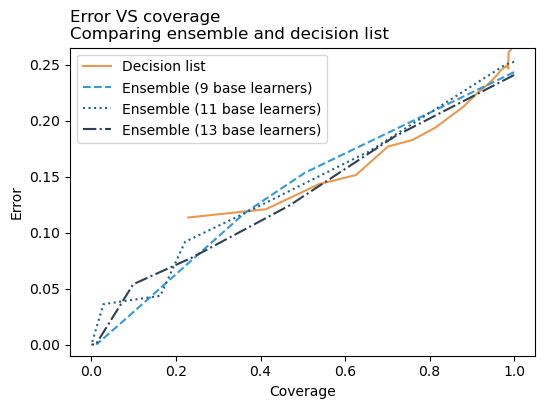

In [48]:
############ plot charts to compare with frost24 ##############
#### read frost24 people's data
filename = 'PartiallyInterpretableModelsResults.csv'
raw = pd.read_csv("./data/"+filename).fillna(0)
# print(raw.info())
theirs = raw.values[np.where(raw.values[:,0]==their_result_dataset_name)] 

theirs = theirs[:,1:].astype(np.float64)

# number_of_rules 0
# coverages 3
# accuracy 4
# accuracy std 8 
# print(adult[:,4]/100)

#### read our data
k_list,theta_list = init_k_theta(root)
filename = 'train_test_stats.csv'
ours = pd.read_csv("./output/"+root+filename)

######## put their data into k_m_ee_cc columns #############
# ['k',  0
# 'margin', 1
# 'train_error_mean', 2
# 'train_error_std', 3
# 'train_ERROR_mean', 4
# 'train_ERROR_std', 5
# 'train_cover_mean', 6
# 'train_cover_std', 7
# 'test_error_mean', 8
# 'test_error_std', 9
# 'test_ERROR_mean', 10
# 'test_ERROR_std', 11
# 'test_cover_mean', 12
# 'test_cover_std'] 13
line = np.zeros((theirs.shape[0],14))
line[:,0] = theirs[:,1] # k
line[:,8] = 1.0-theirs[:,4]/100 # test_error_mean
line[:,9] = 1.0-theirs[:,8]/100 # test_error_std
line[:,12] = theirs[:,3]/100 # test_cover_mean

lines = [line]
labels = ["Decision list"]

for k in k_list:
    line = ours.values[np.where(ours.values[:,0]==k)] 
    lines.append(line)
    labels.append('Ensemble (' + str(k)+' base learners)')
    
colors = ["#eb984e",'#3498db','#1f618d',"#2e4053"]
ls = ['solid','dashed','dotted','dashdot','dashdotted','densely dashdotted']
color_ls = {'c':colors,'l':ls}


plot_error_by_cover(lines,labels=labels,band=False,title="Error VS coverage \nComparing ensemble and decision list", file_name=root+'error_cover_multi_DL',y_lim=True,color_ls=color_ls)
